<a href="https://colab.research.google.com/github/Psomi/Data-Analysis_practice/blob/main/3_logit_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

1. Using `dataset.csv`, train the best model to perform the following tasks.

* ***Task 1*** (3-class Classification): Predict the diagnosis group of subjects
<br>Colum A (DX_bl): Diagnosis group of subject
<br>0: Cognitive normal
<br>1: Mild cognitive impairment
<br>2: Alzheimer’s disease

* ***Task 2*** (3-logit Regression): Predict the cognitive assessment scores of subjects
<br>Colum B (ADAS11): Alzheimer's Disease Assessment Scale (11 questions version)
<br>Colum C (ADAS13): Alzheimer's Disease Assessment Scale (13 questions version)
<br>Colum D (MMSE): Mini-Mental State Examination

2. Save the best model.

A minimal example code for your reference

```python
!wget https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import joblib
from google.colab import files

train_df = pd.read_csv('dataset.csv')

X = train_df[[c for c in train_df.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE']]]
y = train_df['DX_bl']
y1  = train_df['ADAS11']
y2  = train_df['ADAS13']
y3  = train_df['MMSE']

X = X.fillna(0)

clf = RandomForestClassifier(random_state=42).fit(X, y)

reg1 = RandomForestRegressor(random_state=42).fit(X, y1)
reg2 = RandomForestRegressor(random_state=42).fit(X, y2)
reg3 = RandomForestRegressor(random_state=42).fit(X, y3)

joblib.dump(clf, 'clf.pkl', compress=1)
joblib.dump(reg1, 'reg1.pkl', compress=1)
joblib.dump(reg2, 'reg2.pkl', compress=1)
joblib.dump(reg3, 'reg3.pkl', compress=1)

files.download('clf.pkl')
files.download('reg1.pkl')
files.download('reg2.pkl')
files.download('reg3.pkl')
```



### Compile the below code to get the dataset!!

# Get the Data

In [ ]:
!wget https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv

--2022-05-15 09:43:00--  https://raw.githubusercontent.com/wltjr1007/wltjr1007.github.io/master/class_datasets/midterm/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1247513 (1.2M) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]   1.19M  --.-KB/s    in 0.009s  

2022-05-15 09:43:00 (134 MB/s) - ‘dataset.csv’ saved [1247513/1247513]



In [ ]:
### START HERE !! ###
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df=pd.read_csv('dataset.csv')

# Look at Data Structure

In [ ]:
train_df.head()

,DX_bl,ADAS11,ADAS13,MMSE,ST102CV,ST103CV,ST104CV,ST105CV,ST106CV,ST107CV,...,ST84TA,ST85TA,ST90TA,ST91TA,ST93TA,ST94TA,ST95TA,ST97TA,ST98TA,ST99TA
0,0,0.0,0.0,30,5010,2418,4905,2749,3689,2095,...,2.603,3.149,2.631,3.247,2.783,2.523,2.588,2.441,2.346,3.215
1,0,0.0,1.0,30,3422,1961,3596,2240,3269,2198,...,2.556,2.570,2.448,2.697,3.004,2.080,2.561,1.854,2.467,2.947
2,0,1.0,1.0,29,5061,1829,3945,2793,5027,2913,...,2.723,2.738,2.514,3.007,2.501,2.400,2.559,2.047,2.590,2.854
3,0,1.0,1.0,29,3574,1749,4072,2378,3045,2259,...,2.381,2.557,2.312,2.629,2.010,1.965,2.364,1.803,2.119,2.816
4,0,1.0,1.0,29,4085,1846,3325,2672,3212,1759,...,2.456,2.859,2.641,2.999,2.155,2.371,2.582,2.104,2.259,3.003


In [ ]:
train_df.info()
# all numeric , no categorical feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1607 entries, 0 to 1606
Columns: 144 entries, DX_bl to ST99TA
dtypes: float64(76), int64(68)
memory usage: 1.8 MB


# Discover and Visualize Data to Gain Insights

In [ ]:
data=train_df.copy()

> 내가 예측해야하는 y 값들의 분포도 생성
- 특이점은 없었고 값들이 다양하게 분포하였다.

In [ ]:
X=data[[c for c in train_df.columns if c not in ['DX_bl','ADAS11','ADAS13','MMSE']]]
y=data[['ADAS11','ADAS13','MMSE']]
y1=data['ADAS11']
y2=data['ADAS13']
y3=data['MMSE']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


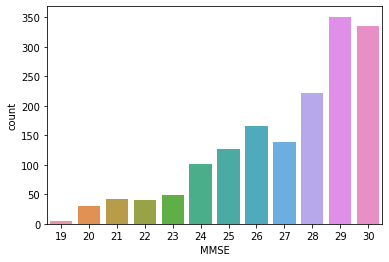

In [ ]:
ax=sns.countplot(y3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


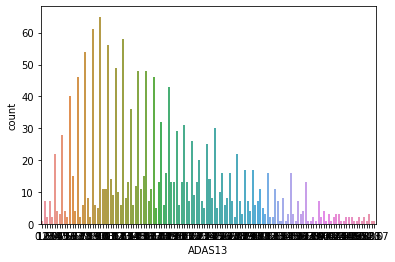

In [ ]:
ax=sns.countplot(y2) #y1의 분포도 y2와 비슷

> Correlation 분석
- 0보다 크면 positive correlation, 값이 커질수록 서로의 상관관계가 높다
- 0보다 작으면 negative correlation

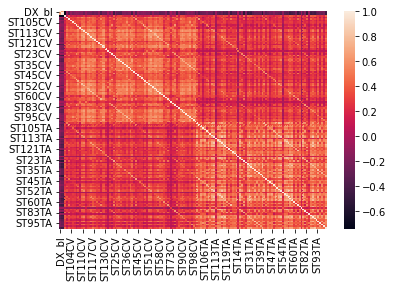

In [ ]:
# 모든 변수들의 상관관계 분석을 위해 heatmap 이용
corr_matrix =data.corr()
sns.heatmap(corr_matrix)
plt.show()

# 밝을 수록 상관관계가 높다.

>Scatter Matrix
- 모든 숫자형 변수에 대해 표현하기에는 변수가 너무 많으니 상관관계가 높은 3개 변수에 대해 표현

In [ ]:
# y값들 중 하나인 MMSE와 높은 상관계수 순으로 나열
corr_matrix["MMSE"].drop("MMSE").sort_values(ascending=False)

ST24TA    0.488183
ST40TA    0.464506
ST83TA    0.463840
ST26TA    0.445664
ST99TA    0.437439
            ...   
ST73TA    0.037809
ST73CV    0.015876
ADAS11   -0.718490
DX_bl    -0.723285
ADAS13   -0.742193
Name: MMSE, Length: 143, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f2dadb790>,
      dtype=object)

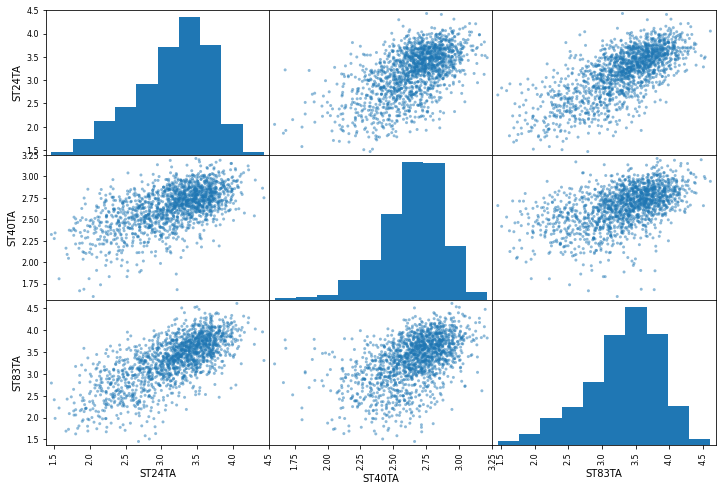

In [ ]:
# MMSE와 높은 상관관계를 가잔 ST24TA, ST40TA, ST83TA 의 scatter_matrix
from pandas.plotting import scatter_matrix
attributes=["ST24TA", "ST40TA", "ST83TA"]
scatter_matrix(data[attributes],figsize=(12,8))

> - 양의 상관관계로 보이지만 outlier로 판단되는 데이터들도 많이 보인다. 
- outlier는 범위를 지정해 제거할 수도 있지만 이 데이터들은 환자에게서 얻은 의학 데이터이기에 함부로 outlier로 판단하고 지우기에는 위험이 크다.

# Data Cleaning

In [ ]:
missing_values_count=train_df.isnull().sum()

In [ ]:
# how many total missing values?
missing_values_count.sum()

3392

ST123CV    847
ST24CV       1
ST44CV       1
ST64CV     847
ST123TA    847
ST24TA       1
ST44TA       1
ST64TA     847
dtype: int64


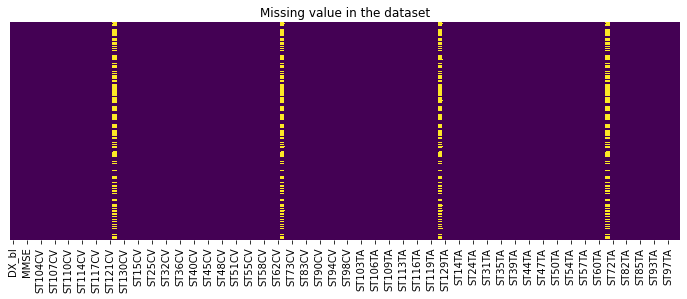

In [ ]:
# check where the missing values are
import seaborn as sns
plt.figure(figsize=(12,4))
sns.heatmap(train_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');
print(missing_values_count[missing_values_count>0])

>- 빈 데이터를 포함하는 값들 중 특히 ST123CV, ST64CV, ST123TA, ST64TA 의 빈 값을 무엇으로 채울까에 대한 고민이 필요하다. <br>
- 빈 데이터는 기록되지 않은 값이거나 없는 값으로 생각할 수 있다. 기록되지 않은 것이라면 예측해서 넣고 없는 값이면 제거하면 된다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

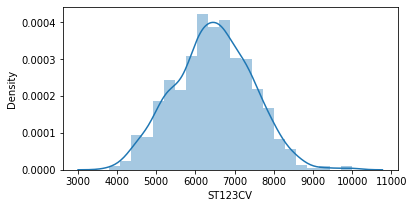

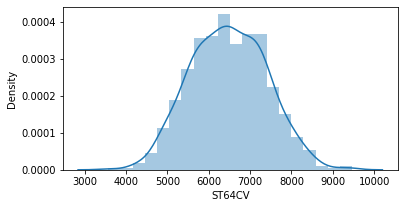

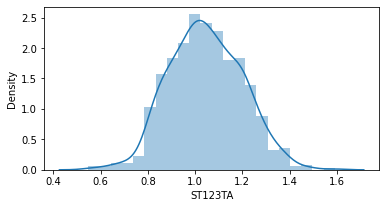

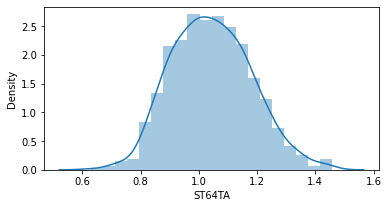

In [ ]:
# 대체할 값을 생각하기위해 데이터 분포를 보았다 
plt.figure(figsize=(6,3))
sns.distplot(train_df["ST123CV"])
plt.figure(figsize=(6,3))
sns.distplot(train_df["ST64CV"])
plt.figure(figsize=(6,3))
sns.distplot(train_df["ST123TA"])
plt.figure(figsize=(6,3))
sns.distplot(train_df["ST64TA"])
plt.show()

>

>- ST123CV, ST64CV, ST123TA, ST64TA 의 분포도를 보면 한쪽으로 심하게 치우치지 않았으므로 빈 값을 중간값, 평균값 아무거나 사용해도 될 것 같다

> Replacing NaN value with 2 options <br>
- option1 : replace with 0
- option2 : replace with mean
- option3 : drop all => 이 방법은 이번 분석에는 사용하지 않았다.

In [ ]:
# option 1. replace with 0

train_df=train_df.fillna(0)

In [ ]:
# option 2. replace with mean
train_df=train_df.fillna(train_df.mean())

In [ ]:
train_df.mean()

DX_bl         0.889857
ADAS11       10.687623
ADAS13       16.838836
MMSE         27.197884
ST102CV    3415.757312
              ...     
ST94TA        2.077695
ST95TA        2.463360
ST97TA        1.850768
ST98TA        2.264312
ST99TA        2.705311
Length: 144, dtype: float64

In [ ]:
train_df['ST123TA']

0       1.046057
1       1.192000
2       1.046057
3       1.046057
4       1.046057
          ...   
1602    1.046057
1603    1.046057
1604    1.046057
1605    1.046057
1606    0.834000
Name: ST123TA, Length: 1607, dtype: float64

In [ ]:
# Nan value가 없음을 다시 한번 확인
train_df.isnull().sum().sum()

0

> Data Scaling

In [ ]:
X=train_df[[c for c in train_df.columns if c not in ['DX_bl','ADAS11','ADAS13','MMSE']]]
y=train_df[['ADAS11','ADAS13','MMSE']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)

# Select and Train model

>Split data into Test/Train

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=79)

In [ ]:
y1_train=y_train['ADAS11']
y1_test=y_test['ADAS11']
y2_train=y_train['ADAS13']
y2_test=y_test['ADAS13']
y3_train=y_train['MMSE']
y3_test=y_test['MMSE']

> #1 Linear Regression

In [ ]:
# Model fit
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y1_train)

LinearRegression()

In [ ]:
# Model prediction & evaluation (MAE)
from sklearn.metrics import mean_absolute_error
y1_pred=lin_reg.predict(X_test)
y1_mae=mean_absolute_error(y1_test,y1_pred)
y1_mae                      

3.9759120121088984

In [ ]:
# y2
lin_reg.fit(X_train,y2_train)
y2_pred=lin_reg.predict(X_test)
y2_mae=mean_absolute_error(y2_test,y2_pred)
y2_mae

5.6013837848514765

In [ ]:
# y3
lin_reg.fit(X_train,y3_train)
y3_pred=lin_reg.predict(X_test)
y3_mae=mean_absolute_error(y3_test,y3_pred)
y3_mae

1.7429224085264172

>#2 Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y1_train)  
y1_pred=ridge_reg.predict(X_test)       
y1_mae=mean_absolute_error(y1_test,y1_pred)
y1_mae                        

3.917191387383582

In [ ]:
ridge_reg.fit(X_train, y2_train)  
y2_pred=ridge_reg.predict(X_test)       
y2_mae=mean_absolute_error(y2_test,y2_pred)
y2_mae    

5.517293631734018

In [ ]:
ridge_reg.fit(X_train, y3_train)  
y3_pred=ridge_reg.predict(X_test)       
y3_mae=mean_absolute_error(y3_test,y3_pred)
y3_mae    

1.7019158222751056

> #3 RandomForestRegressor

In [ ]:
reg1=RandomForestRegressor(random_state=79).fit(X_train,y1_train)
reg2=RandomForestRegressor(random_state=79).fit(X_train,y2_train)
reg3=RandomForestRegressor(random_state=79).fit(X_train,y3_train)

In [ ]:
y1_pred=reg1.predict(X_test)
y1_mae=mean_absolute_error(y1_test,y1_pred)
y1_mae

3.7474925465838504

In [ ]:
y1_test

318      7.00
1448    18.33
311      7.00
987     11.00
1433    17.67
        ...  
1417    17.00
487      1.00
509      3.00
732      7.33
1005    11.33
Name: ADAS11, Length: 322, dtype: float64

In [ ]:
y1_pred

array([ 6.3901, 16.3696,  7.153 ,  6.8167, 12.9803,  5.7268,  7.2768,
        7.2568, 14.3961,  8.31  ,  7.7663, 17.5335, 12.8032,  8.8334,
        6.0867, 14.9638,  6.8668,  8.2101, 21.5833, 18.4969,  7.1536,
       15.2433,  7.2601, 14.9631,  7.3535,  7.7467,  8.44  , 19.7066,
       21.9435,  9.5535,  8.5899,  8.3697,  8.6465, 11.8065, 13.8504,
       15.8568,  8.0135,  7.3433,  6.5801, 11.9266,  6.8632,  7.6266,
        6.1033, 19.1308,  7.623 , 12.2766, 16.6967, 15.4831,  6.5935,
       13.5033, 12.0068, 17.2269, 16.7402,  7.7597, 13.7971,  8.4099,
        7.48  , 12.3529, 13.8768,  9.53  ,  7.5535,  9.3099, 10.6364,
       18.3338,  9.1299, 16.3303,  9.5398, 10.5198, 16.3969, 11.8395,
        7.6365,  8.7432,  8.7766,  9.9464, 17.0935,  6.4233, 12.1501,
        6.38  ,  7.5767,  8.1504, 16.1167, 19.5067, 20.5036, 15.7399,
        7.4567, 12.9134,  5.94  , 14.0765,  8.127 , 17.7642, 15.44  ,
        6.54  , 15.1765,  7.1301,  9.3601,  8.    ,  7.6401, 14.32  ,
        7.6001,  7.8

In [ ]:
y2_pred=reg2.predict(X_test)
y2_mae=mean_absolute_error(y2_test,y2_pred)
y2_mae


5.29404906832298

In [ ]:
y3_pred=reg3.predict(X_test)
y3_mae=mean_absolute_error(y3_test,y3_pred)
y3_mae

1.5704037267080744

> #4 Fine-tune of RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators': [3, 100, 200], 'max_features': [5,10,20]}]

reg1=RandomForestRegressor(random_state=79)

grid_search=GridSearchCV(reg1,param_grid,cv=5,scoring='neg_mean_absolute_error',return_train_score=True)
grid_search.fit(X_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=79),
             param_grid=[{'max_features': [5, 10, 20],
                          'n_estimators': [3, 100, 200]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'max_features': 20, 'n_estimators': 200}

In [ ]:
reg1=grid_search.best_estimator_

In [ ]:
from sklearn.metrics import mean_absolute_error

y1_pred=reg1.predict(X_test)
y1_mae=mean_absolute_error(y1_test,y1_pred)
y1_mae

3.7740784161490684

In [ ]:
reg2=RandomForestRegressor(random_state=79)
grid_search=GridSearchCV(reg2,param_grid,cv=5,scoring='neg_mean_absolute_error',return_train_score=True)
grid_search.fit(X_train,y2_train)
reg2=grid_search.best_estimator_
y2_pred=reg2.predict(X_test)
y2_mae=mean_absolute_error(y2_test,y2_pred)
y2_mae

5.391488354037267

In [ ]:
reg3=RandomForestRegressor(random_state=79)
grid_search=GridSearchCV(reg3,param_grid,cv=5,scoring='neg_mean_absolute_error',return_train_score=True)
grid_search.fit(X_train,y3_train)
reg3=grid_search.best_estimator_
y3_pred=reg3.predict(X_test)
y3_mae=mean_absolute_error(y3_test,y3_pred)
y3_mae

1.5767080745341617

> Fine tune된 모델의 성능이 기존 randomForesetregressor 모델과 별 차이가 없다. 

> #5 Neural_Net model

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
X_train.shape

(1285, 140)

In [ ]:
y1_train.shape

(1285,)

In [ ]:
# ANN학습을 위해서 X와 Y의 shape을 같게 해줘야 한다
y1_train=y1_train.values.reshape(1285,1)
y2_train=y2_train.values.reshape(1285,1)
y3_train=y3_train.values.reshape(1285,1)

In [ ]:
y2_train.shape

(1285, 1)

In [ ]:
# 모델 생성
model = Sequential()
model.add(Dense(units=5, activation='relu', input_dim=140))
model.add(Dense(units=25,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=1, activation='linear')) #output layer는 수치 그대로 나오게 출력

In [ ]:
model.compile(optimizer='sgd',loss='mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 705       
                                                                 
 dense_1 (Dense)             (None, 25)                150       
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,126
Trainable params: 1,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습
import tensorflow as tf

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
epoch_history=model.fit(X_train,y1_train,epochs=20,batch_size=20,validation_split=0.2,callbacks=[early_stop])

Epoch 1/20
52/52 [==============================] - 1s 9ms/step - loss: 6.7740 - val_loss: 5.4235
Epoch 2/20
52/52 [==============================] - 0s 4ms/step - loss: 5.4085 - val_loss: 5.7526
Epoch 3/20
52/52 [==============================] - 0s 7ms/step - loss: 5.4074 - val_loss: 5.3394
Epoch 4/20
52/52 [==============================] - 0s 7ms/step - loss: 5.3189 - val_loss: 5.2830
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 5.3132 - val_loss: 5.3909
Epoch 6/20
52/52 [==============================] - 0s 5ms/step - loss: 5.2231 - val_loss: 5.1875
Epoch 7/20
52/52 [==============================] - 0s 8ms/step - loss: 5.1765 - val_loss: 5.1429
Epoch 8/20
52/52 [==============================] - 0s 7ms/step - loss: 5.1171 - val_loss: 5.1034
Epoch 9/20
52/52 [==============================] - 0s 7ms/step - loss: 5.0215 - val_loss: 4.9100
Epoch 10/20
52/52 [==============================] - 0s 6ms/step - loss: 4.8447 - val_loss: 4.6741
Epoch 11/20
52/52 [

In [ ]:
epoch_history.history.keys()

dict_keys(['loss', 'val_loss'])

In [ ]:
hist=pd.DataFrame(epoch_history.history)

In [ ]:
hist

,loss,val_loss
0,8.091462,5.411278
1,5.388114,5.473872
2,5.316067,5.321877
3,5.259349,5.239797
4,5.206079,5.736969
5,5.197395,5.618722
6,5.086883,4.992513
7,5.018412,4.843106
8,4.957262,5.534578
9,4.852962,4.681892


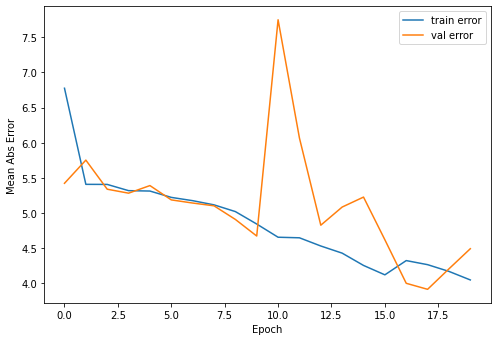

In [ ]:
# train error, val error 시각화

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.title('y1')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['loss'],label='train error')
plt.plot(hist['val_loss'],label='val error')
plt.legend()
plt.show()

> epoch이 커질수록 train error는 점차 감소하는데 val error은 중간에 갑자기 커지는 구간이 있다. overfitting의 증상이 보인다.

In [ ]:
# test data 예측 후 모델 성능 평가
from sklearn.metrics import mean_absolute_error

y1_pred=model.predict(X_test)
y1_mae=mean_absolute_error(y1_test,y1_pred)
y1_mae

4.6614867918831955

In [ ]:
epoch_history=model.fit(X_train,y2_train,epochs=20,batch_size=20,validation_split=0.2,callbacks=[early_stop])

Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 6.4494 - val_loss: 8.7252
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 6.5476 - val_loss: 6.0803
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 5.9851 - val_loss: 7.9793
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 5.9548 - val_loss: 14.3677
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 6.2913 - val_loss: 6.0616
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 5.8537 - val_loss: 6.6228
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 5.9799 - val_loss: 7.9140
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 5.8686 - val_loss: 5.9383
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 5.8285 - val_loss: 5.7881
Epoch 10/20
52/52 [==============================] - 0s 2ms/step - loss: 5.7263 - val_loss: 5.5552
Epoch 11/20
52/52 

In [ ]:
hist=pd.DataFrame(epoch_history.history)

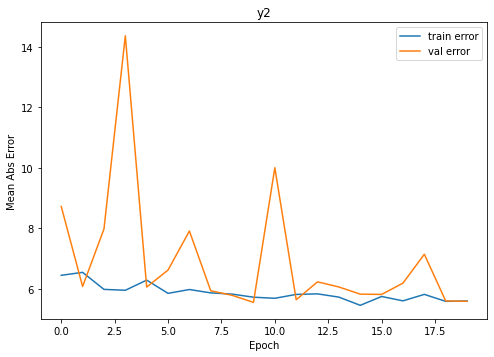

In [ ]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.title('y2')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['loss'],label='train error')
plt.plot(hist['val_loss'],label='val error')
plt.legend()
plt.show()

In [ ]:
y2_pred=model.predict(X_test)
y2_mae=mean_absolute_error(y2_test,y2_pred)
y2_mae

5.516583068800268

In [ ]:
y2_pred 

In [ ]:
y2_test

318     10.00
1448    26.33
311      9.00
987     19.00
1433    27.67
        ...  
1417    27.00
487      4.00
509      5.00
732     12.33
1005    16.33
Name: ADAS13, Length: 322, dtype: float64

In [ ]:
epoch_history=model.fit(X_train,y3_train,epochs=20,batch_size=20,validation_split=0.2,callbacks=[early_stop])

Epoch 1/20
52/52 [==============================] - 0s 5ms/step - loss: 5.1717 - val_loss: 3.5230
Epoch 2/20
52/52 [==============================] - 0s 4ms/step - loss: 4.5384 - val_loss: 3.3986
Epoch 3/20
52/52 [==============================] - 0s 4ms/step - loss: 4.2881 - val_loss: 4.2469
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 4.3935 - val_loss: 5.8102
Epoch 5/20
52/52 [==============================] - 0s 4ms/step - loss: 4.0002 - val_loss: 6.8331
Epoch 6/20
52/52 [==============================] - 0s 4ms/step - loss: 3.7072 - val_loss: 2.0534
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 3.5195 - val_loss: 4.5901
Epoch 8/20
52/52 [==============================] - 0s 4ms/step - loss: 3.1547 - val_loss: 2.3231
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 2.7448 - val_loss: 4.3713
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 2.8888 - val_loss: 2.1808
Epoch 11/20
52/52 [

In [ ]:
hist=pd.DataFrame(epoch_history.history)

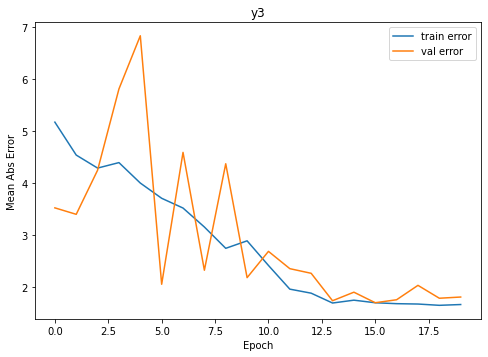

In [ ]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.title('y3')
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(hist['loss'],label='train error')
plt.plot(hist['val_loss'],label='val error')
plt.legend()
plt.show()

In [ ]:
y3_pred=model.predict(X_test)
y3_mae=mean_absolute_error(y3_test,y3_pred)
y3_mae

1.720174362940818

# Compare MAE and select Model

> option1 : Replace NaN with 0


|Model|y1|y2|y3|
|------|---|---|---|
|LinearRegression|3.983|5.610|1.746|
|RidgeRegression|3.918|5.511|1.703|
|RandomForest|3.749|5.296|1.573|
|NeuralNetwork|5.190|6.086|1.743|




> option 2 : Replace NaN with mean => MAE가 전체적으로 더 작다


|Model|y1|y2|y3|
|------|---|---|---|
|LinearRegression|3.975|5.601|1.746|
|RidgeRegression|3.917|5.517|1.701|
|RandomForest|3.747|5.294|1.570|
|NeuralNetwork|4.661|5.516|1.720|

# Save final option and Model

In [ ]:
X = train_df[[c for c in train_df.columns if c not in ['DX_bl', 'ADAS11', 'ADAS13', 'MMSE']]]

y1  = train_df['ADAS11']
y2  = train_df['ADAS13']
y3  = train_df['MMSE']

# option 2
train_df=train_df.fillna(train_df.mean())

reg1=RandomForestRegressor(random_state=79).fit(X_train,y1_train)
reg2=RandomForestRegressor(random_state=79).fit(X_train,y2_train)
reg3=RandomForestRegressor(random_state=79).fit(X_train,y3_train)



In [ ]:
#save the model to file
import joblib
from google.colab import files
joblib.dump(reg1,'reg1.pkl',compress=1)
joblib.dump(reg2,'reg2.pkl',compress=1)
joblib.dump(reg3,'reg3.pkl',compress=1)

files.download('reg1.pkl')
files.download('reg2.pkl')
files.download('reg3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>